In [1]:
# !pip install ipympl

In [2]:
%matplotlib widget

import os 

os.chdir("..")

import numpy as np
import pandas as pd
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from tscluster.opttscluster import OptTSCluster
from tscluster.tskmeans import TSKmeans, TSGlobalKmeans
from tscluster.preprocessing import TSStandardScaler, TSMinMaxScaler
from tscluster.preprocessing.utils import load_data, tnf_to_ntf, ntf_to_tnf, to_dfs
from tscluster.metrics import inertia, max_dist
from tscluster.tsplot import tsplot as tsp

In [3]:
os.chdir("./test/sample_data")

In [4]:
X_mini = np.load("./sythetic_data.npy")
X_mini.shape

(10, 30, 1)

In [5]:
kc_opt_model = OptTSCluster(3, random_state=42, use_full_constraints=1, warm_start=1, 
                          scheme='z1c1', n_allow_assignment_change=None,
                             use_MILP_centroid=True, is_tight_constraints=False, is_Z_positive=True,
                             init_with_prev=False, use_sum_distance=False)

kc_opt_model.fit(ntf_to_tnf(X_mini), verbose=True)

Warm starting...
Done with warm start after 0.31secs

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-18

100.0% of data used
Done with 1 of 1. Ehat: [1.66895988], Estar: [1.66895988]

Total time is 0.81secs



In [6]:
kc_opt_model.fitted_data_shape_

(30, 10, 1)

In [7]:
kc_opt_model.label_dict_

{'T': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 'N': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'F': [0]}

In [8]:
kc_opt_model.set_label_dict_({'T': [0, 1], 'N': ['e1', 'e2', 'e3', 'e4', 'e5'], 'F': ['f1', 'f2']})
kc_opt_model.label_dict_

{'T': [0, 1], 'N': ['e1', 'e2', 'e3', 'e4', 'e5'], 'F': ['f1', 'f2']}

In [9]:
df1 = pd.DataFrame({
    'f1': np.arange(5),
    'f2': np.arange(5, 10)
}, index=['e'+str(i+1) for i in range(5)]
                  )
df1

,f1,f2
e1,0,5
e2,1,6
e3,2,7
e4,3,8
e5,4,9


In [10]:
df2 = pd.DataFrame({
    'f2': np.arange(105, 110),
    'f1': np.arange(100, 105)
}, index=['e'+str(i+1) for i in range(5)]
                  )
df2

,f2,f1
e1,105,100
e2,106,101
e3,107,102
e4,108,103
e5,109,104


In [11]:
X_arr, label_dict = load_data([df1, df2])
X_arr

array([[[  0,   5],
        [  1,   6],
        [  2,   7],
        [  3,   8],
        [  4,   9]],

       [[100, 105],
        [101, 106],
        [102, 107],
        [103, 108],
        [104, 109]]])

In [12]:
label_dict

{'T': [0, 1], 'N': ['e1', 'e2', 'e3', 'e4', 'e5'], 'F': ['f1', 'f2']}

In [13]:
dfs = to_dfs(X_arr, label_dict)
print(len(dfs))
dfs[0]

2


,f1,f2
e1,0,5
e2,1,6
e3,2,7
e4,3,8
e5,4,9


In [14]:
X_arr, label_dict = load_data([df1, df2], arr_format='NTF')
X_arr

array([[[  0.,   5.],
        [100., 105.]],

       [[  1.,   6.],
        [101., 106.]],

       [[  2.,   7.],
        [102., 107.]],

       [[  3.,   8.],
        [103., 108.]],

       [[  4.,   9.],
        [104., 109.]]])

In [15]:
label_dict

{'T': ['e1', 'e2', 'e3', 'e4', 'e5'], 'N': [0, 1], 'F': ['f1', 'f2']}

In [16]:
kc_opt_model = OptTSCluster(3, random_state=42, use_full_constraints=1, warm_start=1, 
                          scheme='z1c1', n_allow_assignment_change=None,
                             use_MILP_centroid=True, is_tight_constraints=False, is_Z_positive=True,
                             init_with_prev=False, use_sum_distance=False)

kc_opt_model.fit(X_mini, verbose=True)

Warm starting...
Done with warm start after 0.26secs


100.0% of data used
Done with 1 of 1. Ehat: [1.52196375], Estar: [1.52196375]

Total time is 0.66secs



In [17]:
kc_opt_model.fitted_data_shape_

(10, 30, 1)

In [18]:
X, l = load_data('./sythetic_data.npy')

print(f"inertia score is {inertia(X, kc_opt_model.cluster_centers_, kc_opt_model.labels_, ord=1)}")
print(f"max_dist score is {max_dist(X, kc_opt_model.cluster_centers_, kc_opt_model.labels_, ord=1)}")
print(f"shape of labels_ is {kc_opt_model.labels_.shape}")
print("head of labels_ is:")
print(kc_opt_model.labels_[:5, :])

print(f"shape of cluster_centers_ is {kc_opt_model.cluster_centers_.shape}")
print("head of cluster_centers_ is:")

if len(kc_opt_model.cluster_centers_.shape) == 3:
    print(kc_opt_model.cluster_centers_[:5, :, :])
else:
    print(kc_opt_model.cluster_centers_)

inertia score is 214.40647069697624
max_dist score is 1.5219637544500682
shape of labels_ is (30, 10)
head of labels_ is:
[[2 2 2 2 2 2 2 2 2 2]
 [1 1 1 1 1 1 1 1 1 1]
 [1 2 1 1 1 1 1 1 1 2]
 [2 0 0 2 0 0 0 0 0 0]
 [1 2 0 1 1 1 1 1 1 2]]
shape of cluster_centers_ is (10, 3, 1)
head of cluster_centers_ is:
[[[ 8.3640779 ]
  [15.38092986]
  [ 9.87721949]]

 [[11.50046295]
  [10.04978372]
  [ 9.40500694]]

 [[ 9.45626162]
  [ 9.41879279]
  [10.36034458]]

 [[10.68152685]
  [ 6.15811016]
  [10.68152685]]

 [[ 8.58872533]
  [ 5.36710865]
  [12.27555051]]]


In [19]:
l_dict =  {
    'T': ['t'+str(t) for t in range(kc_opt_model.fitted_data_shape_[0])], 
    'N': ['e'+str(e) for e in range(kc_opt_model.fitted_data_shape_[1])],
    'F': ['f'+str(f) for f in range(kc_opt_model.fitted_data_shape_[2])]
}

kc_opt_model.get_named_labels(l_dict).head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9
e0,2,2,2,2,2,2,2,2,2,2
e1,1,1,1,1,1,1,1,1,1,1
e2,1,2,1,1,1,1,1,1,1,2
e3,2,0,0,2,0,0,0,0,0,0
e4,1,2,0,1,1,1,1,1,1,2


In [20]:
kc_opt_model.label_dict_

{'T': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'N': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 'F': [0]}

In [21]:
 
centers = kc_opt_model.get_named_cluster_centers(l_dict)
len(centers)

3

In [22]:
centers[0]

,f0
t0,8.364078
t1,11.500463
t2,9.456262
t3,10.681527
t4,8.588725
t5,11.339732
t6,8.403033
t7,11.649322
t8,8.134154
t9,12.781047


In [23]:
centers[0]

,f0
t0,8.364078
t1,11.500463
t2,9.456262
t3,10.681527
t4,8.588725
t5,11.339732
t6,8.403033
t7,11.649322
t8,8.134154
t9,12.781047


In [24]:
centers[1]

,f0
t0,15.380930
t1,10.049784
t2,9.418793
t3,6.158110
t4,5.367109
t5,5.464376
t6,6.618689
t7,9.106237
t8,11.315930
t9,13.775484


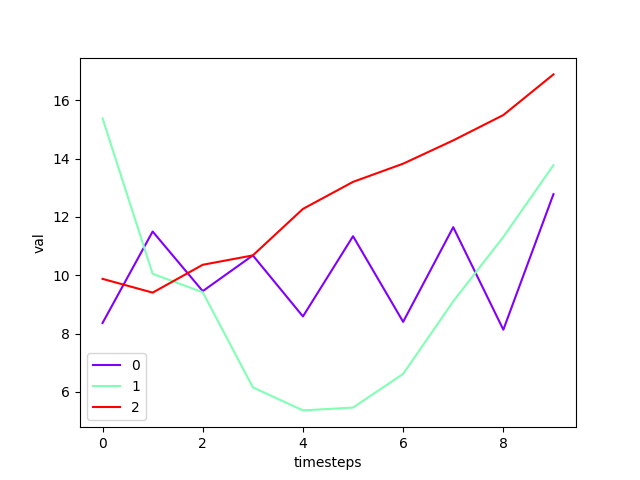

In [25]:
tsp.plot(X=None, cluster_centers=kc_opt_model.cluster_centers_, labels=kc_opt_model.labels_, entity_idx=[0, 5, 10], label_dict=kc_opt_model.label_dict_,
         show_all_entities=0, annot_fontsize=15)

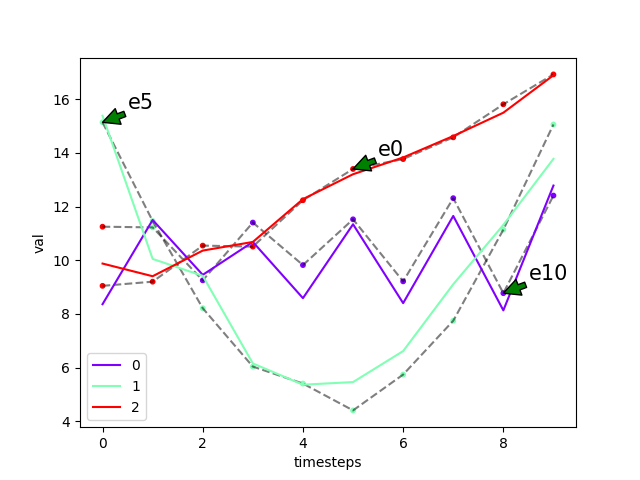

In [80]:
tsp.plot(X=X_mini, cluster_centers=kc_opt_model.cluster_centers_, labels=kc_opt_model.labels_, entity_idx=[0, 5, 10], 
         entities_labels=['e0', 'e5', 'e10'], show_all_entities=0, annot_fontsize=15)

In [27]:
X = random_walks(n_ts=50, sz=32, d=2, random_state=42)
Xt = ntf_to_tnf(X)

In [28]:
km = TSKmeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0)
X, l = load_data(X, arr_format="NTF")
km.fit(X)
print(km.Xt.shape)
print(km.labels_)
print(len(km.labels_))
print(km.cluster_centers_.shape)
print(km.cluster_centers_[0, :5, :])
print()

(50, 32, 2)
[1 0 2 0 1 1 2 1 1 0 2 2 1 0 0 1 1 1 2 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0
 1 0 1 1 0 0 1 1 2 1 1 2 1]
50
(32, 3, 2)
[[ 0.07999396  0.35317914]
 [ 0.19301267 -0.05467002]
 [-0.74667991  0.01571665]]



In [29]:
X.shape

(32, 50, 2)

In [30]:
l_dict = {
        'T': ['t'+str(t) for t in range(km.fitted_data_shape_[0])], 
        'N': ['e'+str(e) for e in range(km.fitted_data_shape_[1])]
}

km.get_named_labels(l_dict).head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31
e0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
e1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
e3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [31]:
# X, l = load_data(X, arr_format="NTF")
km2 = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0).fit(X)
print(km2.labels_)
print(len(km2.labels_))
print(km2.cluster_centers_[:5, 0, :])

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2]
32
[[-2.36641854 -3.64144068]
 [ 0.66558942  0.43836229]
 [-4.62401504 -5.95670081]]


In [32]:
km2.cluster_centers_.shape

(3, 50, 2)

In [33]:
km3 = TSGlobalKmeans(n_clusters=3)
km3.fit(Xt)
print(km3.labels_)
print(km3.labels_.shape)

[[2 0 0 ... 2 2 2]
 [0 0 0 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 ...
 [2 2 2 ... 2 2 2]
 [0 0 0 ... 0 0 0]
 [2 2 2 ... 2 2 2]]
(50, 32)


In [34]:
km3.cluster_centers_

array([[-1.42828873,  4.42764812],
       [ 5.39394517,  0.29384478],
       [-1.45336879, -2.33657382]])

In [35]:
km.get_named_labels().head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [36]:
l_dict = {
        'T': ['t'+str(t) for t in range(km3.fitted_data_shape_[0])], 
        'N': ['e'+str(e) for e in range(km3.fitted_data_shape_[1])],
        'F': ['f'+str(f) for f in range(km3.fitted_data_shape_[2])]
}

km.get_named_labels(l_dict).head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31
e0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
e1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
e3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [37]:
km3.get_named_labels(l_dict).head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31
e0,2,0,0,1,0,0,1,2,2,2,...,2,2,2,2,2,2,2,2,2,2
e1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e2,2,2,2,0,0,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
e3,2,2,2,2,2,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
e4,2,1,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1


In [38]:
centers = km3.get_named_cluster_centers(l_dict)
len(centers)

3

In [39]:
centers[0].head()

,f0,f1
t0,-1.428289,4.427648
t1,-1.428289,4.427648
t2,-1.428289,4.427648
t3,-1.428289,4.427648
t4,-1.428289,4.427648


In [40]:
centers[0].shape

(32, 2)

In [41]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
centers = km.get_named_cluster_centers(l_dict)
len(centers)

3

In [43]:
centers[0].head().rename(columns={'f0': 0, 'f1': 1})

,0,1
t0,0.079994,0.353179
t1,0.122100,0.616886
t2,0.232925,0.574184
t3,0.126162,0.900786
t4,0.255951,0.962521


In [44]:
centers[0]

,f0,f1
t0,0.079994,0.353179
t1,0.122100,0.616886
t2,0.232925,0.574184
t3,0.126162,0.900786
t4,0.255951,0.962521
t5,0.337940,1.452118
t6,0.495632,1.906953
t7,0.492729,1.875849
t8,0.603561,2.267303
t9,0.835442,2.597129


In [45]:
np.linspace(0.926162, 0.900786, 10)

array([0.926162  , 0.92334244, 0.92052289, 0.91770333, 0.91488378,
       0.91206422, 0.90924467, 0.90642511, 0.90360556, 0.900786  ])

In [46]:
n = 1
z0_df = centers[0]
z_values = np.zeros((z0_df.shape[0], (z0_df.shape[1]-1)*n + 1))
for i in range(z0_df.shape[0]):
    for j in range(z0_df.shape[1]):
        if j == z0_df.shape[1] - 1:
            z_values[i, -1] = z0_df.iloc[i, j] 
        else:
            z_values[i, j:j+n] = np.linspace(start=z0_df.iloc[i, j], stop=z0_df.iloc[i, j+1], num=n, endpoint=False)

    
# z_values

In [47]:
z_values.shape

(32, 2)

In [48]:
z0_df

,f0,f1
t0,0.079994,0.353179
t1,0.122100,0.616886
t2,0.232925,0.574184
t3,0.126162,0.900786
t4,0.255951,0.962521
t5,0.337940,1.452118
t6,0.495632,1.906953
t7,0.492729,1.875849
t8,0.603561,2.267303
t9,0.835442,2.597129


(<Figure size 640x480 with 3 Axes>,
 <Axes3D: title={'center': 'Basic 3D Surface Plot'}, xlabel='time-axis', ylabel='Features-axis', zlabel='Feature Values'>)

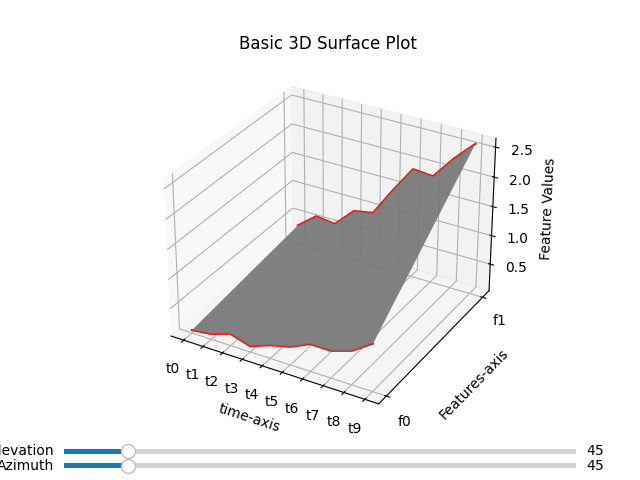

In [49]:
tsp.waterfall_plot(centers[0].iloc[:10])

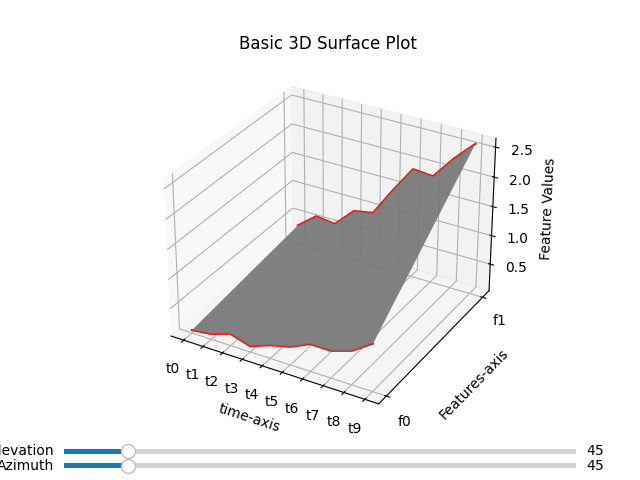

In [50]:
_, ax = tsp.waterfall_plot(centers[0].iloc[:10])

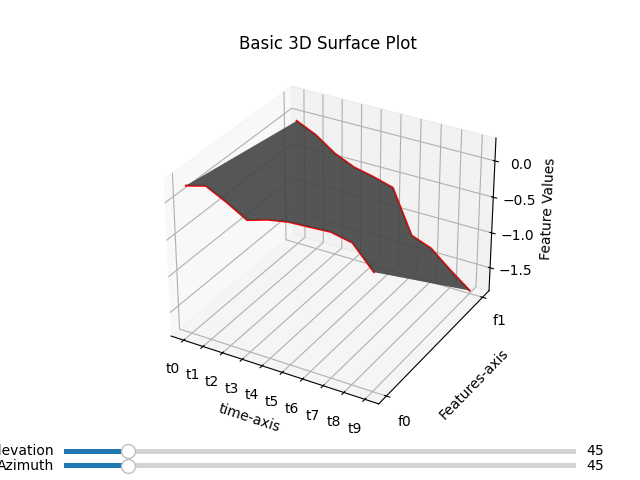

In [51]:
_, ax = tsp.waterfall_plot(centers[1].iloc[:10])
plt.show()

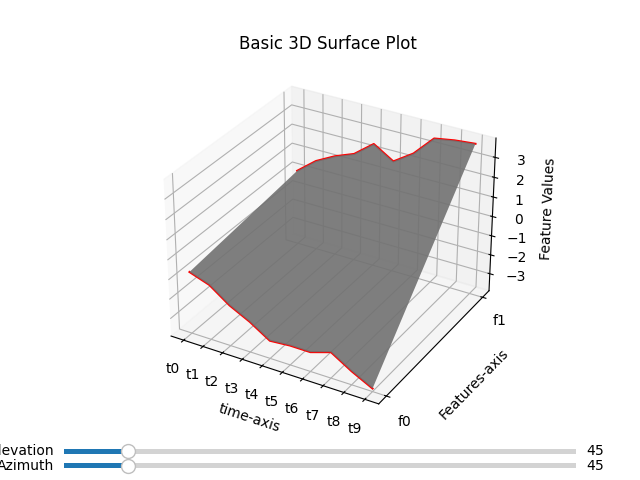

In [91]:
_, ax = tsp.waterfall_plot(centers[2].iloc[:10])
plt.show()

In [93]:
type(ax)

mpl_toolkits.mplot3d.axes3d.Axes3D

In [53]:
X = random_walks(n_ts=50, sz=32, d=2, random_state=42)
Xt = ntf_to_tnf(X)

In [54]:
print("Z score")

print("per_time =True")

scaler = TSStandardScaler(per_time=True)
scaler.fit(ntf_to_tnf(X))
X_scaled = scaler.transform(ntf_to_tnf(X)) 
print(f"Zscore X_scaled shape is {X_scaled.shape}")
print(X_scaled[0, :5, :])
print(f"Original data is:")
print(Xt[0, :5, :])
print("Inverse is: ")
print(scaler.inverse_transform(X_scaled)[0, :5, :])
print()

Z score
per_time =True
Zscore X_scaled shape is (32, 50, 2)
[[ 0.53997391 -0.24777653]
 [ 0.89657801  1.24279008]
 [ 0.09162373 -0.61202562]
 [ 0.22084828 -1.35233303]
 [ 1.40965491 -0.81568142]]
Original data is:
[[ 0.49671415 -0.1382643 ]
 [ 0.81252582  1.35624003]
 [ 0.09965137 -0.50347565]
 [ 0.21409374 -1.24573878]
 [ 1.26691115 -0.70766947]]
Inverse is: 
[[ 0.49671415 -0.1382643 ]
 [ 0.81252582  1.35624003]
 [ 0.09965137 -0.50347565]
 [ 0.21409374 -1.24573878]
 [ 1.26691115 -0.70766947]]



In [55]:
sk_scaler = StandardScaler()
print(sk_scaler.fit_transform(Xt[0])[:5])

print("per_time = False")

scaler = TSStandardScaler(per_time=False)
X_scaled = scaler.fit_transform(Xt)
print(f"Zscore X_scaled shape is {X_scaled.shape}")
print(X_scaled[0, :5, :])
print(f"Original data is:")
print(Xt[0, :5, :])
print("Inverse is: ")
print(scaler.inverse_transform(X_scaled)[0, :5, :])
print()

[[ 0.53997391 -0.24777653]
 [ 0.89657801  1.24279008]
 [ 0.09162373 -0.61202562]
 [ 0.22084828 -1.35233303]
 [ 1.40965491 -0.81568142]]
per_time = False
Zscore X_scaled shape is (32, 50, 2)
[[ 0.14294426 -0.18959971]
 [ 0.22135297  0.16679301]
 [ 0.04436277 -0.27669125]
 [ 0.07277616 -0.45369788]
 [ 0.33416631 -0.32538511]]
Original data is:
[[ 0.49671415 -0.1382643 ]
 [ 0.81252582  1.35624003]
 [ 0.09965137 -0.50347565]
 [ 0.21409374 -1.24573878]
 [ 1.26691115 -0.70766947]]
Inverse is: 
[[ 0.49671415 -0.1382643 ]
 [ 0.81252582  1.35624003]
 [ 0.09965137 -0.50347565]
 [ 0.21409374 -1.24573878]
 [ 1.26691115 -0.70766947]]



In [56]:
sk_scaler = StandardScaler()
print(sk_scaler.fit_transform(np.vstack(Xt))[:5])


print("MinMax")

print("per_time =True")

scaler = TSMinMaxScaler(per_time=True)
X_scaled = scaler.fit_transform(Xt)
print(f"MinMax X_scaled shape is {X_scaled.shape}")
print(X_scaled[0, :5, :])
print(f"Original data is:")
print(Xt[0, :5, :])
print("Inverse is: ")
print(scaler.inverse_transform(X_scaled)[0, :5, :])
print()

[[ 0.14294426 -0.18959971]
 [ 0.22135297  0.16679301]
 [ 0.04436277 -0.27669125]
 [ 0.07277616 -0.45369788]
 [ 0.33416631 -0.32538511]]
MinMax
per_time =True
MinMax X_scaled shape is (32, 50, 2)
[[0.64596382 0.379006  ]
 [0.72055504 0.66472828]
 [0.55218198 0.30918417]
 [0.57921201 0.16727684]
 [0.82787582 0.27014599]]
Original data is:
[[ 0.49671415 -0.1382643 ]
 [ 0.81252582  1.35624003]
 [ 0.09965137 -0.50347565]
 [ 0.21409374 -1.24573878]
 [ 1.26691115 -0.70766947]]
Inverse is: 
[[ 0.49671415 -0.1382643 ]
 [ 0.81252582  1.35624003]
 [ 0.09965137 -0.50347565]
 [ 0.21409374 -1.24573878]
 [ 1.26691115 -0.70766947]]



In [57]:
sk_scaler = MinMaxScaler()
print(sk_scaler.fit_transform(Xt[0])[:5])

print("per_time = False")

scaler = TSMinMaxScaler(per_time=False)
X_scaled = scaler.fit_transform(Xt)
print(f"MinMax X_scaled shape is {X_scaled.shape}")
print(X_scaled[0, :5, :])
print(f"Original data is:")
print(Xt[0, :5, :])
print("Inverse is: ")
print(scaler.inverse_transform(X_scaled)[0, :5, :])
print()

[[0.64596382 0.379006  ]
 [0.72055504 0.66472828]
 [0.55218198 0.30918417]
 [0.57921201 0.16727684]
 [0.82787582 0.27014599]]
per_time = False
MinMax X_scaled shape is (32, 50, 2)
[[0.43439912 0.483141  ]
 [0.44533096 0.53998866]
 [0.42065476 0.46924917]
 [0.42461619 0.44101511]
 [0.46105953 0.46148208]]
Original data is:
[[ 0.49671415 -0.1382643 ]
 [ 0.81252582  1.35624003]
 [ 0.09965137 -0.50347565]
 [ 0.21409374 -1.24573878]
 [ 1.26691115 -0.70766947]]
Inverse is: 
[[ 0.49671415 -0.1382643 ]
 [ 0.81252582  1.35624003]
 [ 0.09965137 -0.50347565]
 [ 0.21409374 -1.24573878]
 [ 1.26691115 -0.70766947]]



In [58]:
sk_scaler = MinMaxScaler()
print(sk_scaler.fit_transform(np.vstack(Xt))[:5])

scaler = TSMinMaxScaler(per_time=False)
print()
print("trying fit(str) for csv")
X, l = load_data("./synthetic_csv")
Xt = scaler.fit_transform(X)
print(Xt[0, :5, :])
print("Inverse tranform for csv")
print(scaler.inverse_transform(Xt)[0, :5, :])

[[0.43439912 0.483141  ]
 [0.44533096 0.53998866]
 [0.42065476 0.46924917]
 [0.42461619 0.44101511]
 [0.46105953 0.46148208]]

trying fit(str) for csv
[[0.67814774 0.45543777]
 [0.54284793 0.41720739]
 [0.81468802 0.44522107]
 [0.52336054 0.68782624]
 [0.712215   0.49158623]]
Inverse tranform for csv
[[ 0.49671415 -0.1382643 ]
 [-0.46341769 -0.46572975]
 [ 1.46564877 -0.2257763 ]
 [-0.60170661  1.85227818]
 [ 0.73846658  0.17136828]]


In [59]:
print()
print("trying fit(str) for json")
X, l = load_data("./synthetic_json")
Xt = scaler.fit_transform(X)
print(Xt[0, :5, :])
print("Inverse tranform for json")
print(scaler.inverse_transform(Xt)[0, :5, :])


trying fit(str) for json
[[0.67814774 0.45543777]
 [0.54284793 0.41720739]
 [0.81468802 0.44522107]
 [0.52336054 0.68782624]
 [0.712215   0.49158623]]
Inverse tranform for json
[[ 0.49671415 -0.1382643 ]
 [-0.46341769 -0.46572975]
 [ 1.46564877 -0.2257763 ]
 [-0.60170661  1.85227818]
 [ 0.73846658  0.17136828]]


In [60]:
print()
print("trying fit(str) for npy")
X, l = load_data("./synthetic_npy")
Xt = scaler.fit_transform(X)
print(Xt[0, :5, :])
print("Inverse tranform for npy")
print(scaler.inverse_transform(Xt)[0, :5, :])


trying fit(str) for npy
[[0.67814774 0.45543777]
 [0.54284793 0.41720739]
 [0.81468802 0.44522107]
 [0.52336054 0.68782624]
 [0.712215   0.49158623]]
Inverse tranform for npy
[[ 0.49671415 -0.1382643 ]
 [-0.46341769 -0.46572975]
 [ 1.46564877 -0.2257763 ]
 [-0.60170661  1.85227818]
 [ 0.73846658  0.17136828]]


In [61]:
print()
print("trying fit(lst) for csv")
file_list = [
    "./synthetic_csv/timestep_0.csv",
    "./synthetic_csv/timestep_1.csv",
    "./synthetic_csv/timestep_2.csv",
    "./synthetic_csv/timestep_3.csv",
    "./synthetic_csv/timestep_4.csv"
]


trying fit(lst) for csv


In [62]:
scaler = TSMinMaxScaler(per_time=False)
X, l = load_data(file_list, read_file_args={'header': None, 'sep': ","})
scaler.fit(X)
Xt = scaler.transform(X)
print(Xt[0, :5, :])
print("Inverse tranform for csv")
print(scaler.inverse_transform(Xt)[0, :5, :])

[[0.67814774 0.45543777]
 [0.54284793 0.41720739]
 [0.81468802 0.44522107]
 [0.52336054 0.68782624]
 [0.712215   0.49158623]]
Inverse tranform for csv
[[ 0.49671415 -0.1382643 ]
 [-0.46341769 -0.46572975]
 [ 1.46564877 -0.2257763 ]
 [-0.60170661  1.85227818]
 [ 0.73846658  0.17136828]]


In [63]:
print()
print("fit_transform")
# scaler.fit(file_list, read_file_args={'header': None, 'sep': ","})
Xt = scaler.fit_transform(X)
print(Xt[0, :5, :])
print("Inverse tranform for csv")
print(scaler.inverse_transform(Xt)[0, :5, :])


fit_transform
[[0.67814774 0.45543777]
 [0.54284793 0.41720739]
 [0.81468802 0.44522107]
 [0.52336054 0.68782624]
 [0.712215   0.49158623]]
Inverse tranform for csv
[[ 0.49671415 -0.1382643 ]
 [-0.46341769 -0.46572975]
 [ 1.46564877 -0.2257763 ]
 [-0.60170661  1.85227818]
 [ 0.73846658  0.17136828]]


In [64]:
km_opt = OptTSCluster(3, random_state=42, use_full_constraints=1, warm_start=1, 
                          scheme='z0c1', n_allow_assignment_change=None,
                             use_MILP_centroid=True, is_tight_constraints=False, is_Z_positive=True,
                             init_with_prev=False, use_sum_distance=False)

km_opt.fit(ntf_to_tnf(X_mini), verbose=True)

Warm starting...
Done with warm start after 0.31secs


100.0% of data used
Done with 1 of 1. Ehat: [2.37955171], Estar: [2.37955171]

Total time is 2.78secs



In [65]:
km_opt.fitted_data_shape_

(30, 10, 1)

In [66]:
km_opt.labels_

array([[2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 0, 2, 2, 2,
        2, 1, 2, 0, 2, 0, 1, 1],
       [2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 1, 2, 2, 2],
       [2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 2, 1, 1, 2, 2, 2, 2],
       [2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 2, 2, 1, 2, 1, 2, 2],
       [2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 2,
        1, 2, 1, 1, 1, 1, 2, 2],
       [2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 0, 2, 1, 2, 1, 2, 2],
       [0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1, 2, 2, 2, 1, 2, 2, 2,
        2, 0, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 0, 0],
       [0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2,
        1, 0, 1, 2, 1, 2, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0,

In [67]:
km_opt.cluster_centers_

array([[16.02988764],
       [ 6.22469661],
       [11.01950892]])

In [68]:
X.shape

(5, 20, 2)

In [69]:
X.shape[-3]

5

In [70]:
(100, *X.shape)

(100, 5, 20, 2)

In [71]:
max(1, 2, 3, 5, 6, 100)

100

In [72]:
d = {'a': 1, 'b': 2}
d

{'a': 1, 'b': 2}

In [73]:
_ = d.setdefault('e', 19)
print(_)

19


In [74]:
d

{'a': 1, 'b': 2, 'e': 19}

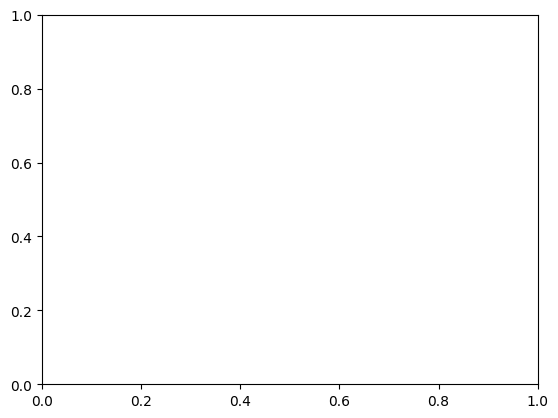

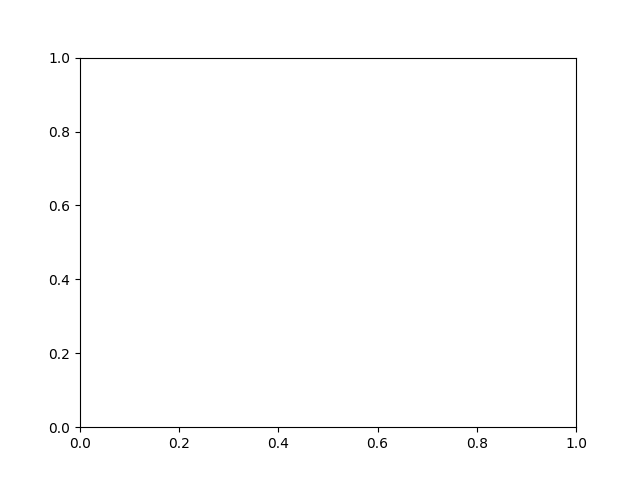

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig

In [94]:
type(ax)

mpl_toolkits.mplot3d.axes3d.Axes3D

In [88]:
import matplotlib

In [89]:
matplotlib.figure.Figure


matplotlib.figure.Figure

In [90]:
type(ax)

matplotlib.axes._axes.Axes

In [ ]:
# for j, f in enumerate(file_list):
#     d = pd.read_csv(f, header=None).head(10)
#     d.index = ['i'+str(i+1) for i in range(d.shape[0])]
#     d.columns = ['x1', 'x2']
#     d['x3'] = np.random.randn(d.shape[0])
#     d.to_csv(f"./synthetic_csv2/year-{np.arange(2000, 2021, 5)[j]}.csv")
# d.head()

In [ ]:
# arr = np.load("./sythetic_data.npy")
# np.random.seed(30)
# idx = np.random.choice(np.arange(arr.shape[1]), 15)
# arr = arr[:, idx, :]
# arr.shape